# Euler puede fracasar: sistemas con leyes de conservación

El método de Euler es sencillo y útil, pero tiene un defecto importante: ¡puede fracasar!, o sea, no integra correctamente las EDOs. De hecho, resulta que *casi siempre fracasa*, no sólo cuantitativamente, sino también cualitativamente.

Por ejemplo, consideremos la ecuación del péndulo para ángulos pequeños, o sea, un oscilador armónico simple, ahora *sin* amortiguamiento.

#### Ejercicio 1

(i) Escribe la ecuación de movimiento del oscilador armónico simple, en términos del ángulo $\theta$ del péndulo desde el vertical, y la velocidad angular $\omega$.

(ii) Dibuja el campo vectorial.

(ii) Integra la ecuación utilizando el método de Euler dibuja bastantes trayectorias en el espacio fase  $(\theta, \omega)$, empezando desde distintas condiciones iniciales.
 ¿Tienen sentido físico? ¿Por qué?

(iii) Recuerda que este sistema físico tiene una propiedad especial: existe una **ley de conservación**. ¿Cuál es la cantidad física que se conserva? Escríbela en términos de $\theta$ y $\omega$.

(iv) Dado que esta cantidad se conserva, ¿qué debe satisfacer una trayectoria que sale de una condición inicial dada? [Pista: piensa en **curvas de nivel**.] ¿Por qué? ¿Puedes escribir una ecuación que describe cómo evoluciona la cantidad conservada a lo largo del tiempo?

Utiliza `contour` para dibujar curvas de nivel, y compáralos gráficamente con las trayectorias que da Euler. ¿Qué observas?

(v) Calcula numéricamente cómo varía la cantidad "conservada" a lo largo de una trayectoria calculada con Euler. ¿Qué ocurre?

In [1]:
#(i)

La ecuacion de movimieno del pendulo simple en terminos de $\theta$ y $\omega$ es:$$$$ $$\frac{d^{2}\theta}{dt^{2}}+\omega^{2}\theta=0 $$

In [2]:
#(ii)

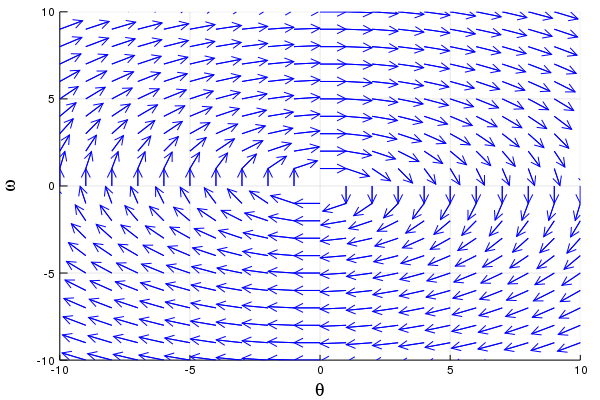

In [3]:
using Plots
gr()
default(fmt = :png)
ts=-10:10
xs=-10:1:10
tts=[t for t in ts for x in xs]
xxs=[x for t in ts for x in xs]
f(x,z)=-0.5x
g(x,z)=z
df(x,z)=normalize([g(x,z),f(x,z)])
quiver(tts,xxs,quiver=df,ylim=(-10,10),xlim=(-10,10),color="blue",xlabel="\\theta",ylabel="\\omega")

Qué nos dice nuestro campo vectorial sobre la dinámica del sistema? En el espacio fase vemos que las soluciones posibles a nuestra ecuación son elipses. Esto quiere decir que las trayectorias de nuestro sistema son cerradas; esto significa que nuestro sistema vuelve a la posición inicial después de un periodo de tiempo. Esto lo esperábamos ya que el movimiento es periódico. 

In [4]:
#(iii)

In [5]:
function eulervec(f,g,h,x0,y0,t0,tf)
    ts=[]
    while t0<tf
        push!(ts,t0)
        t0=t0+h
    end
    A=zeros(size(ts))
    B=zeros(size(ts))
    for i in range(1,length(ts))
        A[i]=x0
        B[i]=y0
        x0=x0+(h*f(x0,y0))
        y0=y0+(h*g(x0,y0))
    end
    return ts,A,B
end

eulervec (generic function with 1 method)

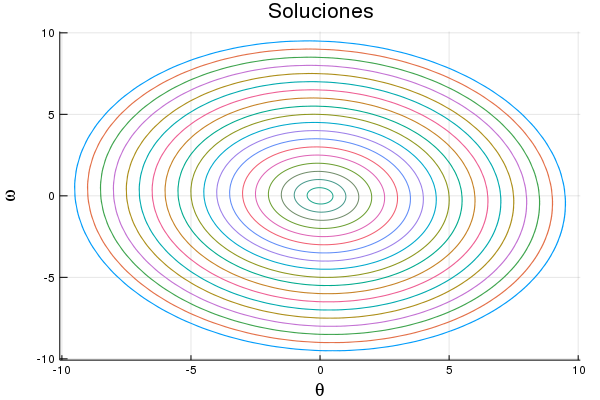

In [6]:
f1(x, y) = y
g1(x, y) = -x
h = 0.1
p=plot(title=("Soluciones"),ylabel=("\\omega"),xlabel=("\\theta"))
for i in 1:20
    l=10-i/2
    x0 = l
    y0=0
    t0=0
    p=plot!(eulervec(f1,g1,h,x0,y0,t0,t0+20)[2],eulervec(f1,g1,h,x0,y0,t0,t0+20)[3],leg=false)
end
p

Las soluciones coinciden muy bien con lo que habíamos observado al hacer el campo vectorial.

In [7]:
#(iv)

La cantidad física que se conserva es la energía, y la podemos escribir en términos de $\theta$ como, $$$$ $$E(\theta,\dot{\theta})=\frac{1}{2}m\dot{\theta}^{2}+\frac{1}{2}m\theta^{2}. $$

In [8]:
#(v)

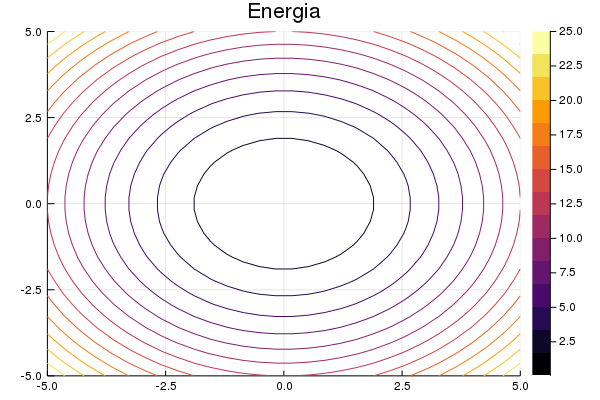

In [9]:
#Dibujemos las curvas de nivel
θp=linspace(-5,5,30)
ω=1
θs=linspace(-5,5,30)
e=[0.5*tetap^2+0.5*ω^2*teta^2 for teta in θs,tetap in θp]
contour(θsp,θp,e,title=("Energia"))

Como hay conservación de la energía, todas las trayectorias tienen que ser cerradas. 

In [10]:
#(vi)

Como hay simetría en el tiempo, podemos usar el teorema de Noether. Si lo aplicamos a la ecuación que teníamos en el primer inciso, $$$$ $$ \frac{d}{dt}(\dot{\theta}^2+\omega^2\theta^2)=0 $$ entonces, $$  \dot{\theta}^2+\omega^2\theta^2=cte.$$

In [11]:
f2(x, y) = y^2
g2(x, y) = 1-x

g2 (generic function with 1 method)

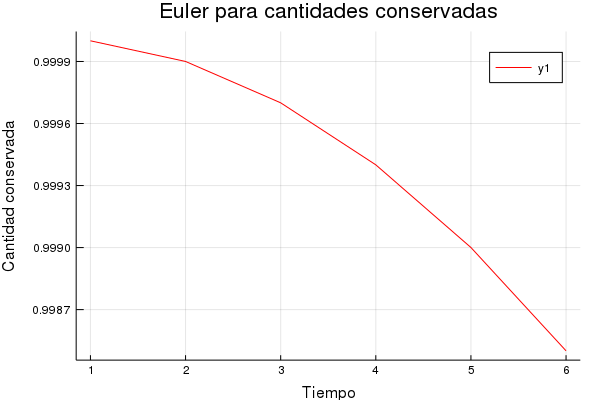

In [12]:
plot([1,2,3,4,5,6],eulervec(f2,g2,0.01,1,1,1,20)[3][1:6],ylabel="Cantidad conservada",color="red",xlabel="Tiempo",title="Euler para cantidades conservadas")

Euler no es un buen método cuando tenemos un sistema con cantidades conservadas. :o!

# El método de Euler-Cromer

Un cambio aparentemente insignificativo al método numérico puede dar resultados mucho mejores para ciertas clases de sistema.

En el llamado método de Euler-Cromer, actualizamos
*primero* la velocidad, y utilizamos esta *nueva* velocidad para actualizar la posición en las reglas usuales del método de Euler.

#### Ejercicio 2

(i) Aplica el método de Euler-Cromer al oscilador armónico. [Haz una versión nueva de tu código de Euler para 2 variables.] Dibuja trayectorias desde varios puntos iniciales en un solo plano fase, junto con las curvas de nivel y campo vectorial correspondientes.

(ii) Encuentra la tasa de convergencia de Euler-Cromer a la solución exacta cuando el tamaño $h$ de un paso converge a cero. ¿Cómo se compara con la tasa de convergencia del método de Euler?

In [13]:
#(i)

In [36]:
#euler cromer para el oscilador armonico
function eulercrom(h,ω0,θ0,t0,tf)
    ts=[]
    while t0<tf
        push!(ts,t0)
        t0=t0+h
    end
    A=zeros(size(ts))
    B=zeros(size(ts))
    for i in range(1,length(ts))
        A[i]=ω0
        B[i]=θ0
        ω0=ω0-(h*θ0)
        θ0=θ0+(h*ω0)
    end
    return ts,A,B
end

eulercrom (generic function with 1 method)

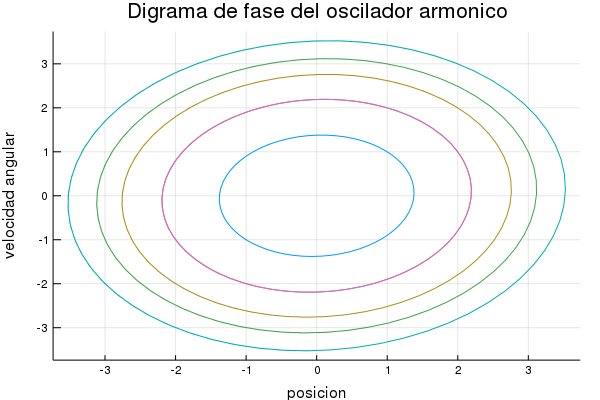

In [15]:
plot(eulercrom(0.1,1,1,0,10)[2],eulercrom(0.1,1,1,0,10)[3],leg=false,title="Digrama de fase del oscilador armonico")
plot!(eulercrom(0.1,1,2,0,10)[2],eulercrom(0.1,1,2,0,10)[3],leg=false,ylabel="velocidad angular",xlabel="posicion")
plot!(eulercrom(0.1,1,3,0,10)[2],eulercrom(0.1,1,3,0,10)[3],leg=false)
plot!(eulercrom(0.1,2,1,0,10)[2],eulercrom(0.1,2,1,0,10)[3],leg=false)
plot!(eulercrom(0.1,2,2,0,10)[2],eulercrom(0.1,2,2,0,10)[3],leg=false)
plot!(eulercrom(0.1,2,3,0,10)[2],eulercrom(0.1,2,3,0,10)[3],leg=false)

La grafica anterior muestra las soluciones de la ecuacion para el oscilador armonico en el espacio fasepara diferentes condiciones iniciales.

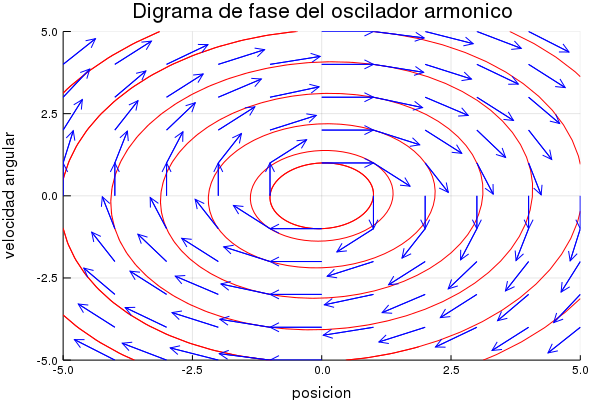

In [16]:
plot(eulercrom(0.1,1,1,0,10)[2],eulercrom(0.1,1,1,0,10)[3],leg=false,title="Digrama de fase del oscilador armonico",color="red")
plot!(eulercrom(0.1,1,2,0,10)[2],eulercrom(0.1,1,2,0,10)[3],leg=false,ylabel="velocidad angular",xlabel="posicion",color="red")
plot!(eulercrom(0.1,1,3,0,10)[2],eulercrom(0.1,1,3,0,10)[3],leg=false,color="red")
plot!(eulercrom(0.1,1,4,0,10)[2],eulercrom(0.1,1,4,0,10)[3],leg=false,color="red")
plot!(eulercrom(0.1,1,5,0,10)[2],eulercrom(0.1,1,5,0,10)[3],leg=false,color="red")
plot!(eulercrom(0.1,1,6,0,10)[2],eulercrom(0.1,1,6,0,10)[3],leg=false,color="red")
plot!(eulercrom(0.1,1,0.1,0,10)[2],eulercrom(0.1,1,0.1,0,10)[3],leg=false,color="red")
plot!(eulercrom(0.1,1,0.1,0,10)[2],eulercrom(0.1,1,0.1,0,10)[3],leg=false,color="red")
ts=-10:10
xs=-10:10
tts=[t for t in ts for x in xs]
xxs=[x for t in ts for x in xs]
ω=1
f(x,z)=-x
g(x,z)=z
df(x,z)=normalize([g(x,z),f(x,z)])
quiver!(tts,xxs,quiver=df,ylim=(-5,5),xlim=(-5,5),color="blue")

En esta grafica, se superponen las soluciones a nuestro campo vectorial.

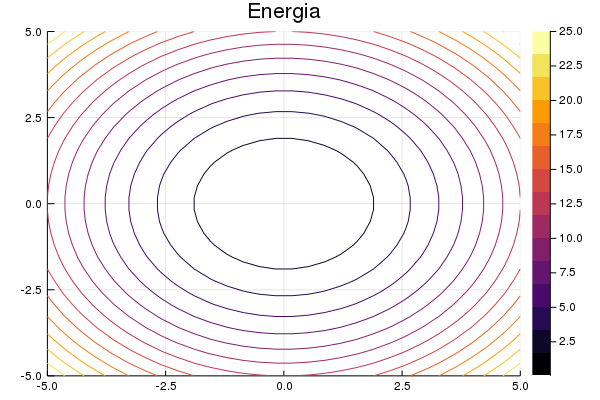

In [34]:
#Dibujemos las curvas de nivel
θp=linspace(-5,5,30)
ω=1
θs=linspace(-5,5,30)
e=[0.5*tetap^2+0.5*ω^2*teta^2 for teta in θs,tetap in θp]
contour(θs,θp,e,title=("Energia"))

In [17]:
#(ii)

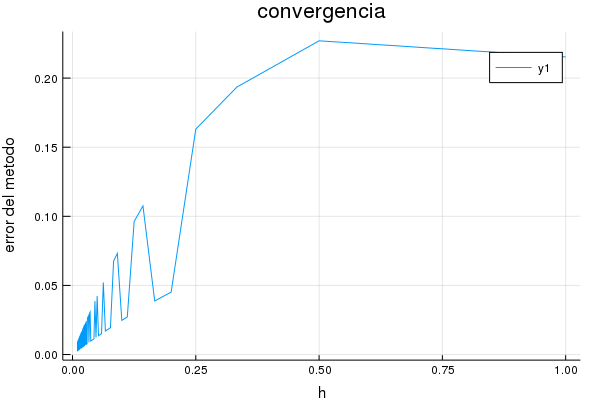

In [84]:
D=[]
T=[]
for i in range(1,100)
    d=abs(eulercrom(1/i,1,0.1,0,10)[2][end]+0.7846721380662288)
    push!(D,d)
    push!(T,1/i)
end
plot(T,D,title="convergencia",xlabel="h",ylabel="error del metodo")  

Converge más rápido que el método de Euler normal.

#### Ejercicio 3

(i) Escribe la EDO que describe un péndulo simple. ¿Cuál cantidad se conserva?

(ii) Aplica Euler-Cromer a este sistema y dibuja bastantes trayectorias en el espacio fase, junto con curvas de nivel y el campo vectorial correspondientes.

(iii) Dibuja el comportamiento de las dos componentes en función del tiempo. 

(iv) Resume el comportamiento físico del sistema.

(v) Hay regiones (puntos, curvas, etc.) especiales en el espacio fase? ¿Cuáles son, y a qué corresponden físicamente?


In [20]:
#(i)

La ecuacion de movimieno del pendulo simple en terminos de $\theta$ y $\omega$ es:$$$$ $$\frac{d^{2}\theta}{dt^{2}}-\frac{g}{L}sin\theta=0.$$ $$$$ Lo anterior lo podemos reescribir como un sistema de ecuaciones de primer orden
 $$$$  $$\frac{d\theta}{dt}=\omega$$ $$$$ $$\frac{d\omega}{dt}=-\frac{g}{L}sin\theta.$$ La cantidad que se conserva es la energia mecanica del sistema. 

In [21]:
#(ii)

In [22]:
#euler cromer para el pendulo simple
function eulercrom2(h,ω0,θ0,t0,tf)
    ts=[]
    while t0<tf
        push!(ts,t0)
        t0=t0+h
    end
    A=zeros(size(ts))
    B=zeros(size(ts))
    for i in range(1,length(ts))
        A[i]=ω0
        B[i]=θ0
        ω0=ω0-(h*sin(θ0))
        θ0=θ0+(h*ω0)
    end
    return ts,A,B
end

eulercrom2 (generic function with 1 method)

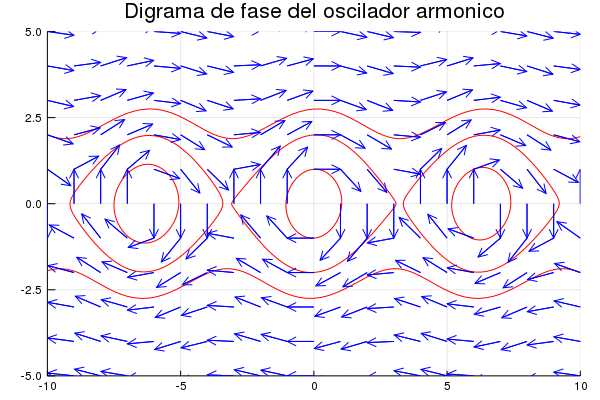

In [23]:
plot(eulercrom2(0.1,1,0.1,0,20)[3],eulercrom2(0.1,1,0.1,0,20)[2],leg=false,title="Digrama de fase del oscilador armonico",color="red")
plot!(eulercrom2(0.1,2,0.1,0,20)[3],eulercrom2(0.1,2,0.1,0,20)[2],leg=false,title="Digrama de fase del oscilador armonico",color="red")
plot!(eulercrom2(0.1,-2,10,0,20)[3],eulercrom2(0.1,-2,10,0,20)[2],leg=false,title="Digrama de fase del oscilador armonico",color="red")
plot!(eulercrom2(0.1,2,-10,0,20)[3],eulercrom2(0.1,2,-10,0,20)[2],leg=false,title="Digrama de fase del oscilador armonico",color="red")
plot!(eulercrom2(0.1,1,6,0,20)[3],eulercrom2(0.1,1,6,0,20)[2],leg=false,title="Digrama de fase del oscilador armonico",color="red")
plot!(eulercrom2(0.1,1,8.4,0,20)[3],eulercrom2(0.1,1,8.4,0,20)[2],leg=false,title="Digrama de fase del oscilador armonico",color="red")
plot!(eulercrom2(0.1,0.004,-7.5,0,20)[3],eulercrom2(0.1,0.004,-7.5,0,20)[2],leg=false,title="Digrama de fase del oscilador armonico",color="red")
plot!(eulercrom2(0.1,0.3,-9,0,20)[3],eulercrom2(0.1,0.3,-9,0,20)[2],leg=false,title="Digrama de fase del oscilador armonico",color="red")

ts=-10:10
ts=-10:10
xs=-10:10
tts=[t for t in ts for x in xs]
xxs=[x for t in ts for x in xs]
ω=1
f(x,z)=-sin(x)
g(x,z)=z
df(x,z)=normalize([g(x,z),f(x,z)])
quiver!(tts,xxs,quiver=df,color="blue",xlim=(-10,10),ylim=(-5,5))

La grafica anterior muestra en rojo cuatro distintas trayectorias en el espacio fase. El campo vectorial se muestra con flechas azules. 

In [24]:
#(iii)

Para dibujar el comportamiento de las dos componentes en funcion del tiempo, primero consideremos angulos pequeños menores a $5^{o}$.

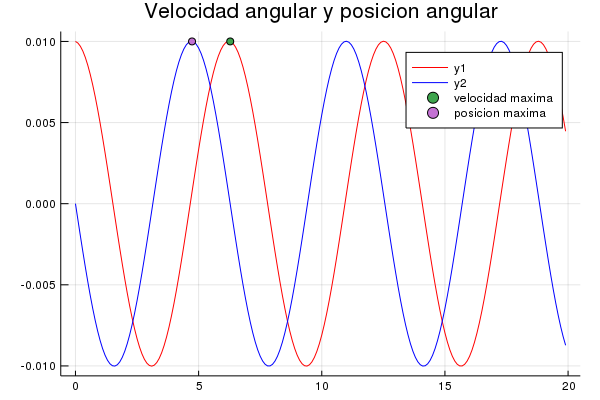

In [25]:
plot(eulercrom2(0.1,0,0.01,0,20)[1],eulercrom2(0.1,0,0.01,0,20)[3],title="Velocidad angular y posicion angular",color="red")
plot!(eulercrom2(0.1,0,0.01,0,20)[1],eulercrom2(0.1,0,0.01,0,20)[2],color="blue")
scatter!([2*pi],[0.01],label="velocidad maxima")
scatter!([2*pi - 1.55],[0.01],label="posicion maxima")


Cuando la energia mecanica del sistema no es muy grande ($\theta$ y $\omega$ pequeños), observamos que la posicion angular y la velocidad angular están desfasadas, pero tienen la misma amplitud. Podemos interpretar este desfase de la siguiente manera: sabemos que un pendulo simple alcanza su velocidad máxima en la posición $\theta=0$ y cuando la amplitud de su movimiento es maxima, su velocidad es igual a cero. Lo anterior se muestra en los puntos marcados de la grafica y se repite con periodo de $2\pi$.

Qué pasa cuando la energia mecanica del sistema no es tan pequeña Es decir, dejamos de uilizar angulos pequeños.

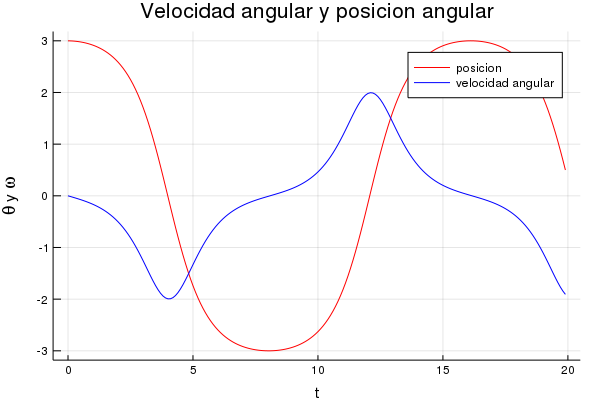

In [26]:
plot(eulercrom2(0.1,0,3,0,20)[1],eulercrom2(0.1,0,3,0,20)[3],title="Velocidad angular y posicion angular",color="red",label="posicion")
plot!(eulercrom2(0.1,0,3,0,20)[1],eulercrom2(0.1,0,3,0,20)[2],color="blue",label="velocidad angular",xlabel="t",ylabel="\\theta y \\omega")


Nuestros resultados tienen significado fisico. Cuando la amplitud del movimiento de nuestro pendulo es cero, la velocidad angular es maxima, pero ya no observamos el comportamiento "bonito" que presentaba nuestro sistema cuando utilizamos angulos pequeños. Esto lo podemos explicar, con el espacio fase. Cuando utilizamos angulos pequeños, podemos aproximar el sistema como un oscilador armonico, entonces las trayectorias en el espacio fase serán elipses y la amplitud de $\omega$ y  $\theta$ serán las mismas. Mientras mas nos alejemos de la aproximacion de angulos pequeños, empezaremos a ver comportamientos más extraños, como el de la figura anterior.

In [27]:
#(iv)

Resumamos el comportamiento fisico del sistema analizando las trayectorias en el espacio fase. En nuestro espacio fase observamos cuatro tipos de trayectorias: las elipses, las elipses deformadas, los "ojos" y las lineas senosoidales que las recubren. Las trayectorias elipticas ya las habiamos visto en el ejercicio anterior; sabemos que corresponden a un oscilador armonico. Tanto las trayectorias elipticas, como las elipses deformadas, son curvas cerradas, es decir que el movimiento del pendulo es periodico. La trayectoria que parece un ojo se denomina separatriz. La separatriz divide al espacio de las fases en regiones que corresponden a dos tipos distintos de movimiento. En la separatriz, nuestro pendulo se encuentra en equilibrio inestable. Cuando la energía total del péndulo es mayor que el máximo valor de la energía potencial, el péndulo da vueltas completas. Las lineas senosoidales que que aparecen en la parte superior e inferior de la grafica describen el movimiento del pendulo cuando tiene suficiente energia para dar vueltas completas.

In [28]:
#(v)

Observamos que el espacio fase es simetrico respecto al eje vertical, entonces sabemos que el movimiento es igual en ambas direcciones del grado de libertad. Podemos observar puntos de equilibrio y trayectorias separatrices, estos corresponden a puntos de equilibrio estables e inestables respectivamente. En la aproximacion para angulos pequeños, el sistema se comporta como un oscilador armónico. Las trayectorias en el espacio fase que no son cerradas, corresponde a casos en los que la energía mecánica del sistema superó al máximo de energía potencial y se produjo una rotación. 

# El método de Euler para atrás

Tomemos otro punto de vista de los métodos numéricos para las EDOs.

Al integrar los dos lados de la EDO

$$\dot{x}(t) = f(x(t), t)$$

con respecto al tiempo para $t$ entre $t_0$ y $t_0+h$, obtenemos

$$x(t_0+h) - x(t_0) = \int_{t_0}^{t_0+h} f(x(t'), t') \, dt'.$$

Por lo tanto, podemos intentar aplicar los métodos numéricos que ya vimos para calcular integrales definidas a este problema.

#### Ejercicio 4

(i) ¿A cuál método de integración numérica corresponde el método de Euler? - es decir, ¿cómo se aproxima la función $f$ adentro de la integral?

(ii) Supón (para simplicidad) que $f$ no depende explícitamente de $t$ y escribe una fórmula analítica de cómo sería un paso del método del trapecio a la integral para encontrar una ecuación para $x(t_0 + h)$. ¿Qué *tipo de* ecuación resulta?

(iii) ¿Cuál método numérico podemos aplicar para resolver esta ecuación?

(iv) Implementa esto y pruébalo. Compara los resultados con los del método de Euler. ¿Converge más rápido?

(v) ¿Cómo se puede aplicar para sistemas con dos variables?

In [ ]:
#(i)

El método de Euler es un método de integración implicita, en el cual para resolver un punto tenemos que usar el mismo punto; aproximamos ese punto de la siguiente manera:
$$ \int_{t_0}^{t_0+h}f(x)dx = f(\epsilon) h \quad \epsilon \in[t_0,t_0+h]$$

Luego aproximamos la integral con un rectangulo de altura $f(x(t_{0}), t_{0})$ y base $h$. Como esta integral ya no depende de las variables originales, el sistema queda como,

$$ \int_{t_0}^{t_0+h} f(x(t), t)dt \approx f(x(t_{0}), t_{0})h.$$

In [ ]:
#(ii)

Luego, por el método del trapecio:
$$ \int_{t_0}^{t_0+h} f(x(t), t)dt \approx \frac{1}{2}[f(x(t_{0}), t_{0})+f(x(t_{0}+h), t_{0}+h)]h.$$
Si reescribimos en la ecuación $x(t_{0}+h)=:x_{n+t}$
entonces,
$$x_{n+1}-x_n=\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]$$
Con lo anterior, podemos definir otra funcion $F$, de la siguiente manera,
$$F(x_{n+1},t)=x_{n+1}-x_n-\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]=0$$

In [ ]:
#(iii)

Nos funcionaría el método de Newton.

In [87]:
#(v)

Repitamos lo que hicimos en el inciso (i) pero esta vez en dos variables. Entonces,
$$ \int_{t_0}^{t_0+h} f(x(t), t)dt \approx f(x(t_{0}), t_{0})h $$
$$ \int_{t_0}^{t_0+h} g(x(t), t)dt \approx g(x(t_{0}), t_{0})h $$
por el método del trapecio
$$ \int_{t_0}^{t_0+h} f(x(t), t)dt \approx \frac{1}{2}[f(x(t_{0}), t_{0})+f(x(t_{0}+h), t_{0}+h)]h $$
$$ \int_{t_0}^{t_0+h} g(x(t), t)dt \approx \frac{1}{2}[g(x(t_{0}), t_{0})+g(x(t_{0}+h), t_{0}+h)]h $$
Luego,
$$x_{n+1}-x_n=\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]$$
$$x_{m+1}-x_m=\frac{1}{2}[g(x_{m+1},t_{m+1})+g(x_m,t_m)]$$
Si definimos $F$ y $G$ como sigue,
$$F(x_{n+1},t)=x_{n+1}-x_n-\frac{1}{2}[f(x_{n+1},t_{n+1})+f(x_n,t_n)]=0$$
$$G(x_{n+1},t)=x_{n+1}-x_n-\frac{1}{2}[g(x_{n+1},t_{n+1})+g(x_n,t_n)]=0$$
y luego solucionamos nuestro sistema con newton multivariable.